# 1. loading datasets

Training has to be done with dropout as data is not always present

In [87]:
import torch
import pandas as pd
import numpy as np
import time
import joblib

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

modelname = 'DNN_model_with_features_SWLab[256, 512, 512, 128]'
modellayer = [256, 512, 512, 128]
no_features = 11


In [88]:

from torch import nn 

# Check PyTorch version
print("PyTorch version:", torch.__version__)

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Get current CUDA device index (if available)
if torch.cuda.is_available():
    print("Current CUDA device index:", torch.cuda.current_device())
    print("CUDA device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("No CUDA devices found.")
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



PyTorch version: 2.5.0+cu118
CUDA available: True
Current CUDA device index: 0
CUDA device name: NVIDIA GeForce RTX 4070 SUPER


In [89]:
# Update with the correct path
# if no_features == 8:
#     file_path = './Data/25-02-10/cleaned_df.csv'
# if no_features == 11:
#     file_path = './Data/25-02-10/cleaned_df_features.csv'
    
# model trained on SWlab
if no_features == 8:
    file_path = './Data/25-02-04/cleaned_df.csv'
if no_features == 11:
    file_path = './Data/25-02-04/cleaned_df_features.csv'

    
model_path = './models/Regression_based'
cleaned_df = pd.read_csv(file_path)

In [90]:
cleaned_df

,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord,RSSI_Mean,RSSI_Variance,RSSI_Median
0,-54,-77,-74,127,127,-78,127,-71,0,0,3.375,10534.553571,-62.5
1,-54,-77,127,-81,127,127,-81,-71,0,0,2.125,10765.553571,-62.5
2,-54,127,127,127,127,127,127,-71,0,0,79.625,7715.696429,127.0
3,-54,-77,-74,-82,127,127,-82,-70,0,0,-23.125,8664.125000,-72.0
4,-54,-77,127,127,127,-78,-80,-70,0,0,2.750,10650.785714,-62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,-70,-69,-80,-65,-79,127,-73,-62,4,3,-46.375,4946.267857,-69.5
7390,-70,-70,-84,-65,-79,-84,-74,-61,4,3,-73.375,71.982143,-72.0
7391,-70,-69,-80,-64,-80,127,-76,-61,4,3,-46.625,4970.267857,-69.5
7392,-70,-70,-82,-67,-83,-84,-79,-61,4,3,-74.500,74.000000,-74.5


In [91]:

# batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]
# time_columns = [col for col in cleaned_df.columns if 'Time' in col]
# columns_to_drop = batt_columns+time_columns
# RSSI_columns = cleaned_df.drop(columns=columns_to_drop)


#Train the model without NAN values
# cleaned_df = RSSI_columns.dropna()

#Convert NaN values to -100 or -999

# cleaned_df = RSSI_columns.fillna(0)
# cleaned_df = RSSI_columns.fillna(-999)


cleaned_df.shape

(7394, 13)

In [92]:
# cleaned_df

In [93]:
from common_utils import preprocess_dataset

if no_features == 8:
    X = cleaned_df[['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']]
if no_features == 11:
    X = cleaned_df[['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI', 'RSSI_Mean', 'RSSI_Variance', 'RSSI_Median']]



Y = cleaned_df[['X_Coord', 'Y_Coord']]

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the results
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", Y_train)
print("Y_test:\n", Y_test)

X_train:
       Tx_0 RSSI  Tx_1 RSSI  Tx_2 RSSI  Tx_3 RSSI  Tx_4 RSSI  Tx_5 RSSI  \
2522        127        -70        -84        -75        -73        -73   
5159        127        -67        -79        -64        127        -59   
5096        -72        -74        127        -71        -66        -64   
6281        127        -79        127        -75        -82        -74   
4935        -82        127        -84        127        -68        -64   
...         ...        ...        ...        ...        ...        ...   
5191        127        -81        -81        -65        -70        127   
5226        127        -79        -86        127        -70        -59   
5390        127        127        -78        -67        -81        -73   
860         -70        -61        127        -71        127        127   
7270        -78        127        -75        -76        -73        -74   

      Tx_6 RSSI  Tx_7 RSSI  RSSI_Mean  RSSI_Variance  RSSI_Median  
2522        -72        -69    -48

# 2. NN model

We will try to determine the optimal hyperparameters
1. Loss function
2. model depth and size, restricted to 3 layers

In [94]:
class MLPBuilder(nn.Module):

    def __init__(self, no_features, layers):
        super().__init__()
        layer_list = []
        
        # Input layer
        layer_list.append(nn.Linear(no_features, layers[0]))
        layer_list.append(nn.ReLU())
        layer_list.append(nn.Dropout(p=0.2))

        # Hidden layers
        for i in range(len(layers) - 1):
            layer_list.append(nn.Linear(layers[i], layers[i+1]))
            layer_list.append(nn.ReLU())
            layer_list.append(nn.Dropout(p=0.2))

        # Output layer, 2 outputs
        layer_list.append(nn.Linear(layers[-1], 2))
 
        # Define the MLP stack as a sequential model
        self.mlp_stack = nn.Sequential(*layer_list)

        self._initialize_weights() 
        
    def forward(self, x):
        logits = self.mlp_stack(x)
        return logits
    
    def _initialize_weights(self):
        for layer in self.mlp_stack:
            if isinstance(layer, nn.Linear):
                # Use Kaiming initialization for ReLU activations
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

In [95]:
scaler_X = MinMaxScaler()

# Normalize the input data (RSSI values) for both training and testing sets
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the scaler for the target coordinates (X_Coord, Y_Coord)
scaler_Y = MinMaxScaler()

# Normalize the target coordinates (X_Coord, Y_Coord) for both training and testing sets
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

# Convert the normalized data to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_scaled, dtype=torch.float32).to(device)


# Create DataLoader for the training set
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create DataLoader for the test set
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Shuffle is typically False for test data

In [96]:
joblib.dump(scaler_X, model_path + '/scaler_X.pkl')
joblib.dump(scaler_Y, model_path + '/scaler_Y.pkl')

# scaler_X = joblib.load('./models/scales/scaler_X.pkl')
# scaler_Y = joblib.load('./models/scales/scaler_Y.pkl')

['./models/Regression_based/scaler_Y.pkl']

In [97]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to device

        optimizer.zero_grad() 
        outputs = model(inputs)  # Forward pass
        loss = loss_fn(outputs, targets)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)  # Average loss for the epoch
    return avg_loss


def test_loop(dataloader, model, loss_fn):
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    
    with torch.no_grad():  # No gradients needed during testing
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to device

            outputs = model(inputs)  # Forward pass
            loss = loss_fn(outputs, targets)  # Compute the loss
            running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)  # Average loss for the epoch
    return avg_loss


In [98]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        """
        patience: number of epochs to wait for improvement in validation loss before stopping
        delta: minimum change to consider as an improvement
        """
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = float('inf')  # Initialize the best loss as infinity
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0  # Reset the counter if there's an improvement
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [99]:
import itertools

x = [64, 128, 256, 512]

combinations = list(itertools.product(x, repeat=4))

# Convert to list format and print
combinations = [list(comb) for comb in combinations]
print(combinations)

[[64, 64, 64, 64], [64, 64, 64, 128], [64, 64, 64, 256], [64, 64, 64, 512], [64, 64, 128, 64], [64, 64, 128, 128], [64, 64, 128, 256], [64, 64, 128, 512], [64, 64, 256, 64], [64, 64, 256, 128], [64, 64, 256, 256], [64, 64, 256, 512], [64, 64, 512, 64], [64, 64, 512, 128], [64, 64, 512, 256], [64, 64, 512, 512], [64, 128, 64, 64], [64, 128, 64, 128], [64, 128, 64, 256], [64, 128, 64, 512], [64, 128, 128, 64], [64, 128, 128, 128], [64, 128, 128, 256], [64, 128, 128, 512], [64, 128, 256, 64], [64, 128, 256, 128], [64, 128, 256, 256], [64, 128, 256, 512], [64, 128, 512, 64], [64, 128, 512, 128], [64, 128, 512, 256], [64, 128, 512, 512], [64, 256, 64, 64], [64, 256, 64, 128], [64, 256, 64, 256], [64, 256, 64, 512], [64, 256, 128, 64], [64, 256, 128, 128], [64, 256, 128, 256], [64, 256, 128, 512], [64, 256, 256, 64], [64, 256, 256, 128], [64, 256, 256, 256], [64, 256, 256, 512], [64, 256, 512, 64], [64, 256, 512, 128], [64, 256, 512, 256], [64, 256, 512, 512], [64, 512, 64, 64], [64, 512, 64

In [100]:
import time
import torch.optim as optim
import torch.nn as nn

def determine_depth_and_width(layer_combinations, epochs):
    results = []  # Store results for all layer configurations
    training_times = []  # List to store training times

    for layers in layer_combinations:
        model = MLPBuilder(no_features=X_train.shape[1], layers=layers).to(device)
        criterion = nn.MSELoss()  # Mean Squared Error loss for regression
        l2_weight_decay = 1e-4
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=l2_weight_decay)

        # Training loop
        print(f"{'=' * 50}\n"
              f"Layers: {layers}"
              )

        start_time = time.time()  # Start timing the training process

        for epoch in range(epochs):
            # Train the model
            train_loss = train_loop(train_loader, model, criterion, optimizer)
            
            # Test the model
            test_loss = test_loop(test_loader, model, criterion)

            # Print average loss for the epoch
            print(f"Epoch: [{epoch + 1:>3}/{epochs:<3}]"
                  f"Train Loss: {train_loss:.6f}  |  "
                  f"Test Loss: {test_loss:.6f}\n")

            # Save results only for the last epoch
            if epoch == epochs - 1:
                results.append({
                    'layers': layers,
                    'train_loss': train_loss,
                    'test_loss': test_loss,
                })

        print(f"{'=' * 50}\n")

        end_time = time.time()  # End timing the training process
        training_time = end_time - start_time  # Calculate total training time
        training_times.append(training_time)  # Append the training time for this configuration

    return results, training_times


To determine the best layout configuration

In [101]:
epochs = 20
# results, training_times = determine_depth_and_width(combinations, epochs)

In [102]:
# test_accuracies = [result['test_loss']for result in results]  # List of test accuracies (in percentage)
# layer_configs = [str(result['layers']) for result in results]  # Layer configurations as strings

# # Create a scatter plot for Test Accuracy vs. Training Time
# plt.figure(figsize=(10, 6))
# for i, layer_size in enumerate(layer_configs):
#     plt.scatter(training_times[i], test_accuracies[i], color='b')  # Plot point
#     plt.text(training_times[i], test_accuracies[i], layer_size, fontsize=9, ha='right')  # Add text label for each point

# # Adding labels and title
# plt.xlabel('Training Time (seconds)')
# plt.ylabel('Test Loss')
# plt.title('Test Accuracy vs Training Time for Different Layer Configurations')

# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [103]:
# top_results = sorted(results, key=lambda x: x['test_loss'])[:5]

# # Print the top 5 configurations and their test losses
# print("Top 5 Configurations with Lowest Test Loss:")
# for i, result in enumerate(top_results, start=1):
#     print(f"{i}. Layers: {result['layers']}, Test Loss: {result['test_loss']:.6f}")

### The Best Model is seen to be [256,128,32] with the highest accuracy

## Evaluation of Model

In [104]:
import torch
import torch.optim as optim
import torch.nn as nn
import time 

model = MLPBuilder(no_features=X_train.shape[1], layers=modellayer).to(device)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=10, delta=0.001)

# Number of epochs to train
best_modelepochs = 200
tr_loss, te_loss = [], []  
start_time = time.time()

for epoch in range(best_modelepochs):

    train_loss = train_loop(train_loader, model, criterion, optimizer)
    test_loss = test_loop(test_loader, model, criterion)
    
    print(f"Epoch: [{epoch + 1:>3}/{best_modelepochs:<3}]"
          f"Train Loss: {train_loss:.6f}  |  "
          f"Test Loss: {test_loss:.6f}\n")

    tr_loss.append(train_loss)
    te_loss.append(test_loss)

    early_stopping(test_loss)
    
    # If early stopping is triggered, break out of the loop
    if early_stopping.early_stop:
        print(f"Early stopping triggered at epoch {epoch + 1}")
        break


end_time = time.time() 
total_time = end_time - start_time  

print(f"Total training time: {total_time:.2f} seconds.")

Epoch: [  1/200]Train Loss: 0.197613  |  Test Loss: 0.111017

Epoch: [  2/200]Train Loss: 0.114815  |  Test Loss: 0.106570

Epoch: [  3/200]Train Loss: 0.108608  |  Test Loss: 0.097106

Epoch: [  4/200]Train Loss: 0.104498  |  Test Loss: 0.095954

Epoch: [  5/200]Train Loss: 0.101491  |  Test Loss: 0.092180

Epoch: [  6/200]Train Loss: 0.100021  |  Test Loss: 0.093621

Epoch: [  7/200]Train Loss: 0.098799  |  Test Loss: 0.089966

Epoch: [  8/200]Train Loss: 0.096140  |  Test Loss: 0.088686

Epoch: [  9/200]Train Loss: 0.095555  |  Test Loss: 0.089708

Epoch: [ 10/200]Train Loss: 0.094519  |  Test Loss: 0.090262

Epoch: [ 11/200]Train Loss: 0.092995  |  Test Loss: 0.087048

Epoch: [ 12/200]Train Loss: 0.092652  |  Test Loss: 0.085159

Epoch: [ 13/200]Train Loss: 0.091496  |  Test Loss: 0.085718

Epoch: [ 14/200]Train Loss: 0.089927  |  Test Loss: 0.084692

Epoch: [ 15/200]Train Loss: 0.089828  |  Test Loss: 0.083404

Epoch: [ 16/200]Train Loss: 0.087878  |  Test Loss: 0.081107

Epoch: [

In [105]:
# Save the model
torch.save(model.state_dict(), 'models/Regression_based/'+ modelname +'.pth')
print("Model saved successfully.")


Model saved successfully.


In [106]:
# Ensure min and max values are stored before transformation
Y_min = torch.tensor(Y_train.min().values, dtype=torch.float32, device=device)
Y_max = torch.tensor(Y_train.max().values, dtype=torch.float32, device=device)


model.eval()

# Choose a sample input from the test set
inputs = X_test_tensor[:5]  # Select the first 5 samples

# Perform the forward pass
with torch.no_grad():
    outputs = model(inputs)  

# Manual denormalization (MinMax Scaling)
outputs_denormalized = outputs * (Y_max - Y_min) + Y_min
actual = Y_test_tensor[:5] * (Y_max - Y_min) + Y_min

# Move to CPU for printing
print("Predicted X and Y coordinates (denormalized):\n", outputs_denormalized.cpu().numpy())
print("Actual Coordinates:\n", actual.cpu().numpy())


Predicted X and Y coordinates (denormalized):
 [[6.0734806  3.3080378 ]
 [5.948631   3.1833472 ]
 [3.9040456  2.4729033 ]
 [6.1187296  5.331575  ]
 [0.13326073 2.7698493 ]]
Actual Coordinates:
 [[6. 3.]
 [6. 4.]
 [3. 6.]
 [6. 5.]
 [4. 1.]]


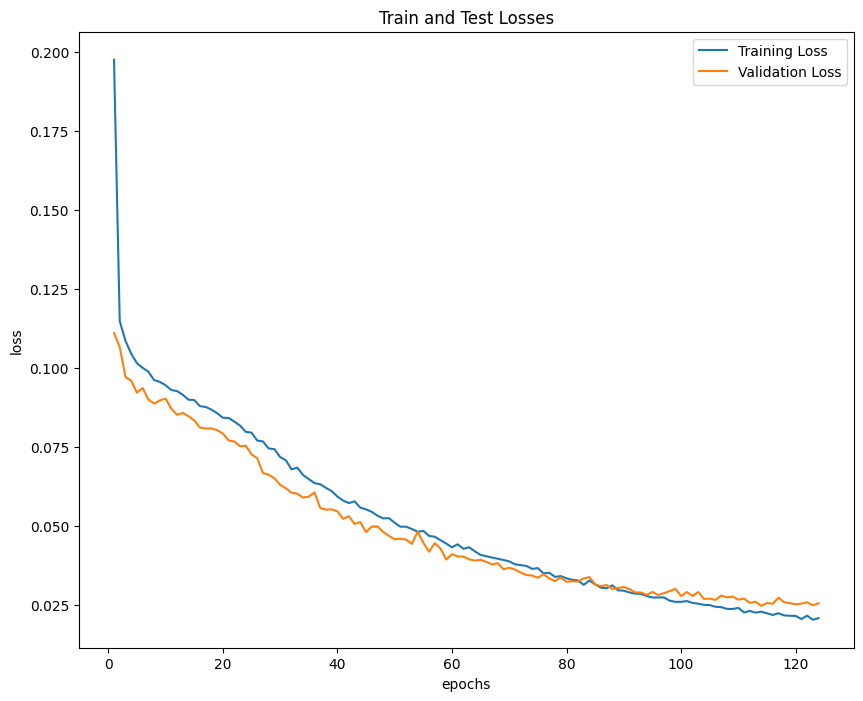

In [107]:

plt.figure(figsize=(10, 8))
plt.plot(range(1,len(tr_loss)+1),tr_loss, label='Training Loss')
plt.plot(range(1,len(te_loss)+1),te_loss,label='Validation Loss')


plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Test Losses')
plt.legend()

plt.show()
